EXPLORING RELATIONSHIPS - THIS SCRIP CONTAINS THE FOLLOWING:

1. Importing Visualization Libraries and Data
2. Cleaning a bit more.
2. Exploring Relationships.
    - Correlations
    - Scatterplots
    - Pair Plots
    - Categorical Plots

1. IMPORTING VISUALIZATIONS LIBRARIES AND DATA:

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the charts I create will display in the notebook without the need to "call" them specifically.
%matplotlib inline

In [3]:
# creating path to import the files
path = r'C:\Users\rbrand\New York Citi Bikes'

In [4]:
# Importing cb_clean_data.csv data set from prepared data.
cb_clean_data2 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cb_clean_data2.csv'), index_col=False)

2. Cleaning the data: Dropping the columns Unnamed: 0.1 and Unnamed: 0 before the analysis.

In [13]:
# Dropping the columns 'Unnamed: 0.1' and 'Unnamed: 0'
cb_clean_data2 = cb_clean_data2.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [14]:
cb_clean_data2.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,trip_duration_minutes
0,LnQzQk,16013,Mon,18,9/9/2013 18:18,523,W 38 St & 8 Ave,40.754666,-73.991382,9/9/2013 18:35,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,16.550000
1,IL9boN,15230,Thu,18,9/12/2013 18:38,257,Lispenard St & Broadway,40.719392,-74.002472,9/12/2013 18:48,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,9.683333
2,46clGB,17942,Wed,19,9/18/2013 19:44,479,9 Ave & W 45 St,40.760193,-73.991255,9/18/2013 19:50,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,6.016667
3,v7vdFt,19683,Sat,11,9/28/2013 11:54,527,E 33 St & 1 Ave,40.743156,-73.974347,9/28/2013 12:03,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,9.350000
4,VGBsb5,18024,Sat,18,9/7/2013 18:08,521,8 Ave & W 31 St,40.750450,-73.994811,9/7/2013 18:46,476,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978.0,1,38.266667


2. EXPLORING RELATIONSHIPS:

    - CORRELATIONS

In [15]:
# Excluding non-numeric columns
numeric_columns = cb_clean_data2.select_dtypes(include=['number'])

In [16]:
# Calculating and printing the correlation matrix
correlation_matrix = numeric_columns.corr()

print("Head of the Correlation Matrix:")
print(correlation_matrix.head())

Head of the Correlation Matrix:
                          bike_id  start_hour  start_station_id  \
bike_id                  1.000000   -0.000866          0.003608   
start_hour              -0.000866    1.000000         -0.001270   
start_station_id         0.003608   -0.001270          1.000000   
start_station_latitude  -0.009604   -0.009121          0.106504   
start_station_longitude -0.002193   -0.045734          0.082925   

                         start_station_latitude  start_station_longitude  \
bike_id                               -0.009604                -0.002193   
start_hour                            -0.009121                -0.045734   
start_station_id                       0.106504                 0.082925   
start_station_latitude                 1.000000                 0.211969   
start_station_longitude                0.211969                 1.000000   

                         end_station_id  end_station_latitude  \
bike_id                        0.002357    

In [5]:
# Selecting variables for correlation analysis
selected_variables = ['trip_duration_minutes', 'start_hour', 'birth_year', 'gender']

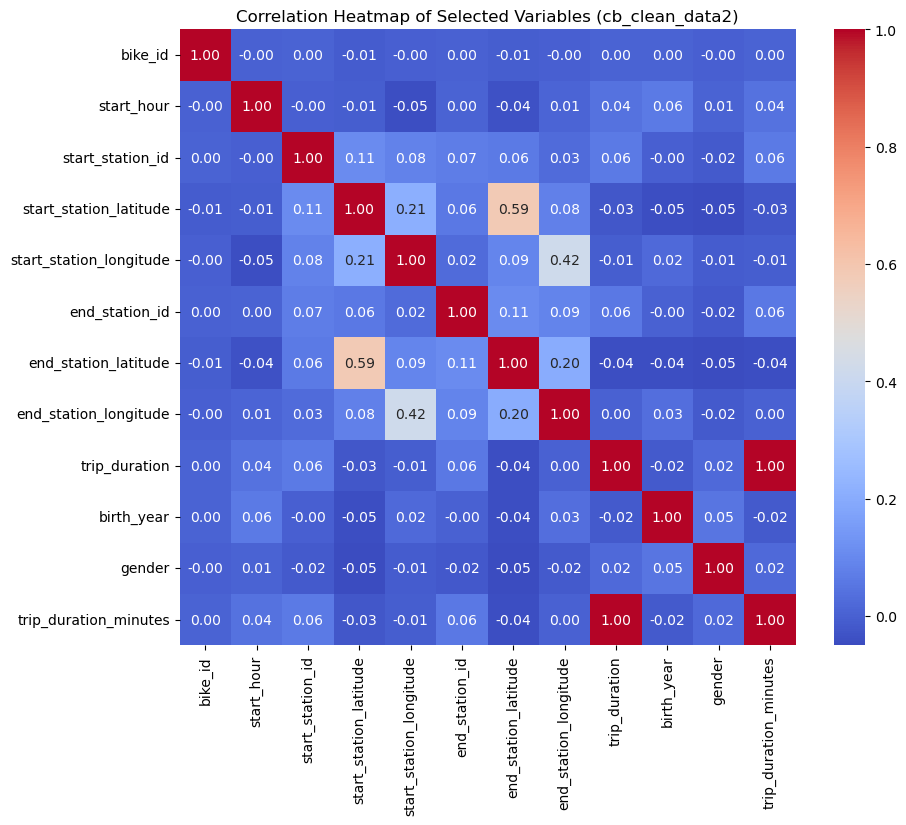

In [17]:
# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Selected Variables (cb_clean_data2)')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'correlation_heatmap.png'))
plt.show()

The matrix and the headmap shows the correlation coefficients between pairs of variables in the dataset. Each cell in the matrix represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1. We can observe the following:

- Temporal Patterns: There is a positive correlation (0.041) between start_hour and trip_duration_minutes, indicating that as the starting hour of the trip increases, the trip duration tends to increase slightly. This suggests potential temporal patterns in trip durations throughout the day.

- Geographical Relationships: There is a moderate positive correlation (0.213) between start_station_latitude and start_station_longitude, indicating that stations with higher latitude tend to have higher longitude as well. This suggests a geographical pattern in the distribution of bike stations within the dataset.

    - SCATTERPLOTS

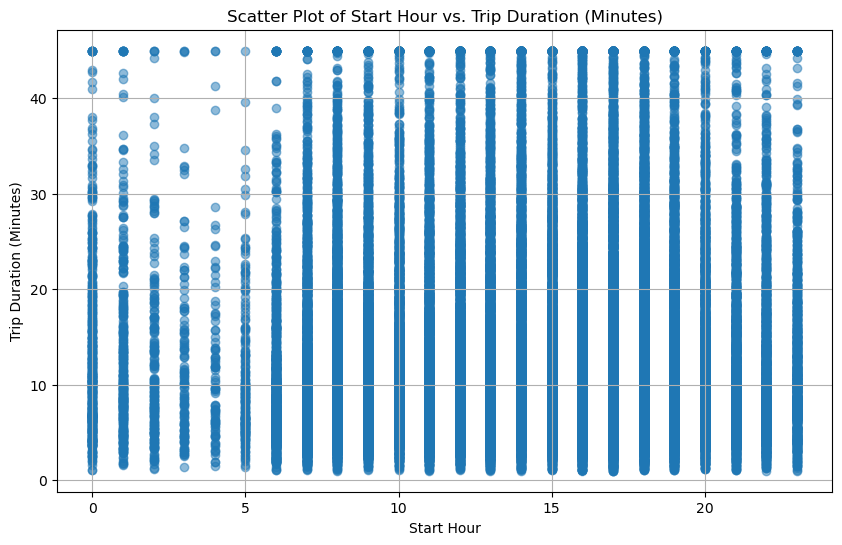

In [18]:
# Scatter plot for start_hour and trip_duration_minutes
plt.figure(figsize=(10, 6))
plt.scatter(cb_clean_data2['start_hour'], cb_clean_data2['trip_duration_minutes'], alpha=0.5)
plt.title('Scatter Plot of Start Hour vs. Trip Duration (Minutes)')
plt.xlabel('Start Hour')
plt.ylabel('Trip Duration (Minutes)')
plt.grid(True)
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot_hours.png'))
plt.show()

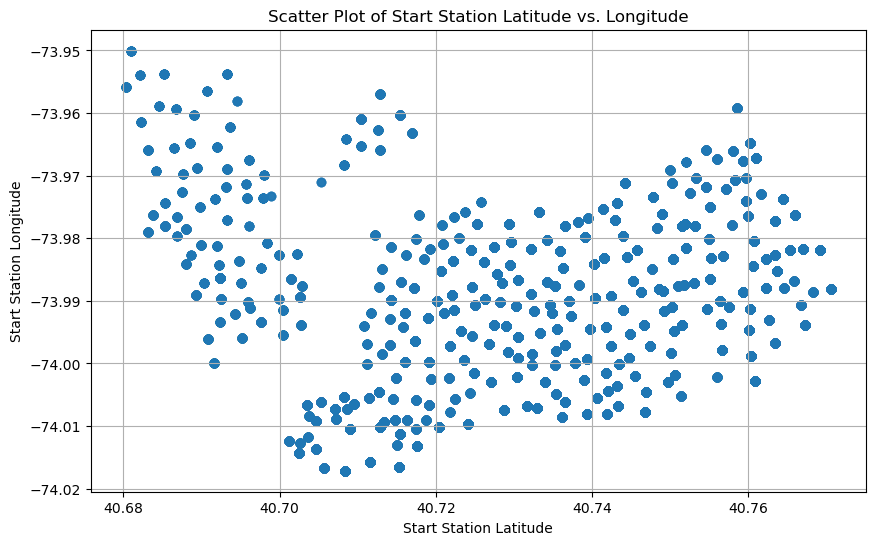

In [19]:
# Scatter plot for start_station_latitude and start_station_longitude
plt.figure(figsize=(10, 6))
plt.scatter(cb_clean_data2['start_station_latitude'], cb_clean_data2['start_station_longitude'], alpha=0.5)
plt.title('Scatter Plot of Start Station Latitude vs. Longitude')
plt.xlabel('Start Station Latitude')
plt.ylabel('Start Station Longitude')
plt.grid(True)
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'scatterplot_stations.png'))
plt.show()

Scatter Plot of Start Hour vs. Trip Duration (Minutes):
    - There doesn't seem to be a strong correlation between start hour and trip duration. The distribution of trip durations is fairly consistent across different start hours, indicating that the time of day might not have a significant impact on how long a trip lasts.
Scatter Plot of Start Station Latitude vs. Longitude: 
    - The scatter plot shows the geographical distribution of start stations across latitude and longitude coordinates.
    - Clusters of start stations can be observed, suggesting areas where bike rentals are more popular.
    - The second scatter plot provides a visual representation of the spatial distribution of bike rentals, which can be useful for understanding the usage patterns of the bike-sharing system within the city.

    - PAIR PLOTS

In [30]:
# Performing sampling for better interpretation
sampled_data = cb_clean_data2.sample(n=1000, random_state=42)

In [31]:
# Selecting variables for the pair plot
pairplot_vars = ['start_hour', 'trip_duration_minutes', 'birth_year', 'gender']

In [36]:
# Map gender values to colors
gender_colors = {1: 'blue', 2: 'pink'}

C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rbrand\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_l

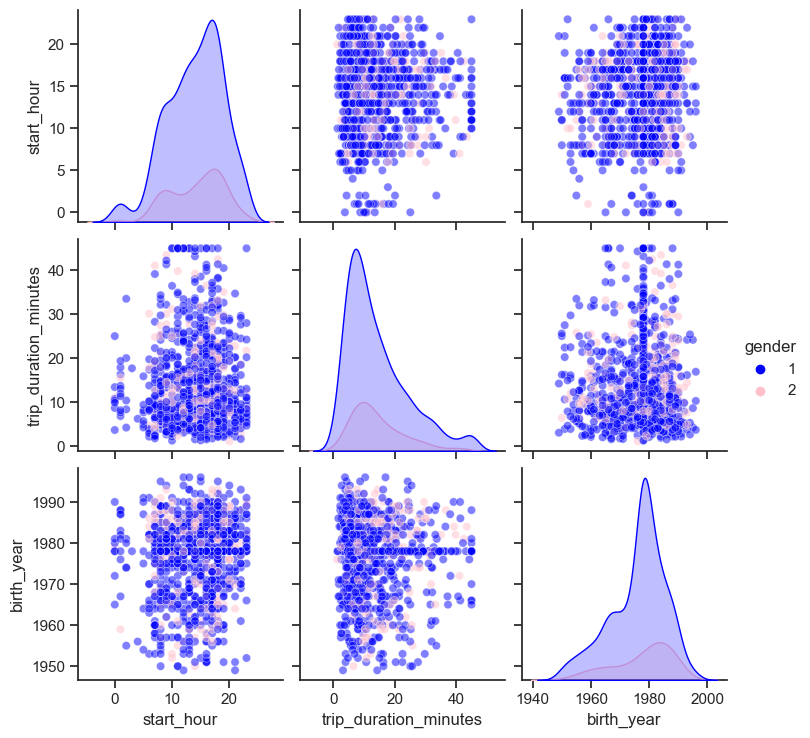

In [39]:
# Generating pair plot with colors
sns.set(style="ticks")
pairplot = sns.pairplot(sampled_data[pairplot_vars], hue='gender', palette=gender_colors, plot_kws={'alpha':0.5})
pairplot.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'pairplot_with_gender_color.png'))
plt.show()

From the pairplot, several insights can be drawn regarding the distribution of variables and potential avenues for further exploration:
     1. Gender and Start Hour Comparison:
        - The pairplot reveals the distribution of start hour for both genders.
        - Further exploration can focus on comparing the start hour distributions between genders to identify any differences in usage patterns throughout the day.
        - Understanding these differences can help tailor marketing strategies or optimize bike allocation based on gender-specific usage trends.
        
    2. Trip Duration Minutes:
        - The pairplot illustrates the distribution of trip duration in minutes.
        - Exploration of trip duration can involve analyzing factors influencing longer or shorter trips, such as time of day, start station location, or user demographics.
        - Identifying trends in trip duration can inform service improvements, pricing strategies, or infrastructure planning to enhance user experience.
        
    3. Birth Year:
        - The pairplot displays the distribution of birth years among users.
        - Further investigation may involve analyzing how user demographics, such as age cohorts, correlate with biking behavior, trip frequency, or trip duration.
        - Understanding the demographics of bike users can aid in targeted marketing efforts, user segmentation, or the development of tailored services to specific age groups.
        

        - CATEGORICAL PLOTS

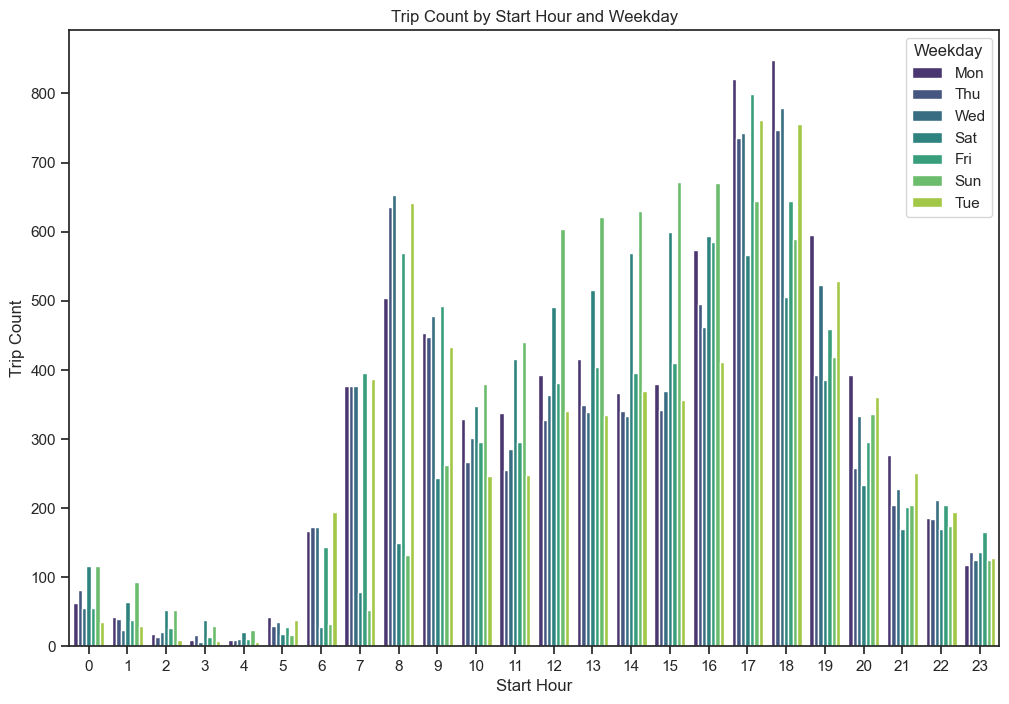

In [49]:
# Counting the number of trips based on start hour and weekday
trip_counts = cb_clean_data2.groupby(['start_hour', 'weekday']).size().reset_index(name='trip_count')

# Visualizing the trends in trip count based on weekday and start hour
plt.figure(figsize=(12, 8))
sns.countplot(data=cb_clean_data2, x='start_hour', hue='weekday', palette='viridis')
plt.title('Trip Count by Start Hour and Weekday')
plt.xlabel('Start Hour')
plt.ylabel('Trip Count')
plt.legend(title='Weekday')

# Saving the figure
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'trip_count_start_hour_weekday.png'))

# Showing the plot
plt.show()

- Most Common Start Hour: The most common start hour for trips is 17, which corresponds to 5:00 PM. This suggests that a significant number of trips start during the late afternoon or early evening hours.

- Most Common Weekday: Monday is the most common weekday for trips. This could imply that there is a higher demand for transportation services at the beginning of the workweek, possibly due to commuting or other weekday activities.


Based on the analysis I conducted so far, we can elaborate the following questions with some hypotesis:

    1. What is the distribution of trip durations? The distribution of trip durations appears to be right-skewed, with the majority of trips lasting between 0 and 30 minutes. There is also a small number of longer trips, indicating potential outliers or specific types of journeys
    
    2. Is there a difference in trip durations between weekdays and weekends? (Hypothesis): Trips during weekdays may have shorter durations on average compared to weekends. This hypothesis is based on the assumption that weekday trips might primarily involve commuting or shorter errands, while weekend trips could include leisure activities or longer-distance travel.
    
    3. How does trip duration vary by the hour of the day? (Hypothesis) Trip durations may vary throughout the day, with potential peaks during rush hours and shorter durations during off-peak times. This hypothesis is grounded in the expectation that trips during peak hours might involve slower travel due to congestion, while off-peak hours may allow for quicker journeys.
    
    4. Is there any correlation between trip duration and the user's gender? (Hypothesis) There may be differences in trip durations between genders, with one gender potentially taking longer trips on average compared to the other. This hypothesis could be based on various factors such as travel preferences, trip purposes, or even safety concerns.
    
    5. How does the distribution of trip start times vary between weekdays and weekends? The most common start hour for trips is 17, which corresponds to 5:00 PM. However, further exploration is needed to determine how the distribution varies between weekdays and weekends.
    
    6. Is there a correlation between the start hour of a trip and its duration? (Hypothesis) The start hour of a trip may influence its duration, with trips starting during peak hours potentially having longer durations due to traffic congestion or other factors. Conversely, trips during off-peak hours may have shorter durations.

In [51]:
#Exporting cb_clean_data3. 
cb_clean_data2.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'cb_clean_data3.csv'))